# 물체인식 및 분류
테스트 - 학습 - Validation

## 1 OverView
간단하게 살펴보기

In [1]:
# setup-only-ignore
import tensorflow as tf
import numpy as np

tf.nn.conv2d    # 컨볼루션 레이어
tf.nn.relu      # relu 함수
tf.nn.max_pool  # Pooling 레이어 
tf.matmul       # Fully Connected 레이어

<function tensorflow.python.ops.math_ops.matmul>

In [2]:
# setup-only-ignore
sess = tf.InteractiveSession()

image_batch = tf.constant([
        [  # First Image : 높이 2pixel, 폭 3pixel
            [[0, 255, 0], [0, 255, 0], [0, 255, 0]],
            [[0, 255, 0], [0, 255, 0], [0, 255, 0]]],
        [  # Second Image : 높이 2pixel, 폭 3pixel
            [[0, 0, 255], [0, 0, 255], [0, 0, 255]],
            [[0, 0, 255], [0, 0, 255], [0, 0, 255]]] ])
image_batch.get_shape()

TensorShape([Dimension(2), Dimension(2), Dimension(3), Dimension(3)])

In [3]:
# [First Image] [첫 픽셀] [색상값] : list indexing --> [ red , green , Yellow ]
sess.run(image_batch)[0][0][0]

array([  0, 255,   0], dtype=int32)

## 2 Convolution Nural Network
입력 tensor 의 차원을 줄인다. (회귀식 대신에 차원을 줄인 layer를 생성)

### Input & Kernal
tf.nn.conv2d() 

In [4]:
sess.close()
# setup-only-ignore
sess = tf.InteractiveSession()

# 입력 tensor
input_batch = tf.constant([
        [  # First Input
            [[0.0], [1.0]],
            [[2.0], [3.0]]],
        [  # Second Input
            [[2.0], [4.0]],
            [[6.0], [8.0]]] ])
input_batch.shape

TensorShape([Dimension(2), Dimension(2), Dimension(2), Dimension(1)])

In [5]:
# 조작 Kernel ( weight, filter, convolution matrix, mask 으로도 불린다 )
# 2개 의 channel로 구성된 kernel : 1) 원본값 그대로 출력 channel, 2) 2배 증폭 channel
kernel = tf.constant([  [[[1.0, 2.0]]]  ])
kernel.shape

TensorShape([Dimension(1), Dimension(1), Dimension(1), Dimension(2)])

In [6]:
# Convolution Layer
# 커널의 연관된 값으로 곱한 후, Feature map 의 연관된 레이어에 더해진다.
conv2d = tf.nn.conv2d(input_batch, kernel, strides=[1, 1, 1, 1], padding='SAME')
#lower_right_image_pixel
sess.run(input_batch)[0][1][1]

array([ 3.], dtype=float32)

In [7]:
#lower_right_kernel_pixel
sess.run(conv2d)[0][1][1]

array([ 3.,  6.], dtype=float32)

### Stride 
kernel 적용식 큰 걸음 걷기

In [8]:
sess.close()
import tensorflow as tf
sess = tf.InteractiveSession()

input_batch = tf.constant([
        [  # First Input (6x6x1)
            [[0.0], [1.0], [2.0], [3.0], [4.0], [5.0]],
            [[0.1], [1.1], [2.1], [3.1], [4.1], [5.1]],
            [[0.2], [1.2], [2.2], [3.2], [4.2], [5.2]],
            [[0.3], [1.3], [2.3], [3.3], [4.3], [5.3]],
            [[0.4], [1.4], [2.4], [3.4], [4.4], [5.4]],
            [[0.5], [1.5], [2.5], [3.5], [4.5], [5.5]], ]])
input_batch.shape

TensorShape([Dimension(1), Dimension(6), Dimension(6), Dimension(1)])

In [9]:
kernel = tf.constant([  # Kernel (3x3x1)
        [[[0.0]], [[0.5]], [[0.0]]],
        [[[0.0]], [[1.0]], [[0.0]]],
        [[[0.0]], [[0.5]], [[0.0]]]  ])
kernel.shape

TensorShape([Dimension(3), Dimension(3), Dimension(1), Dimension(1)])

In [10]:
# stride = [입력 tensor , 3 x 3 stride, 1 layer ]
conv2d = tf.nn.conv2d(input_batch, kernel, strides=[1, 2, 2, 1], padding='SAME')
sess.run(tf.minimum(tf.nn.relu(conv2d),  255))

array([[[[  2.20000005],
         [  6.19999981],
         [ 10.19999981]],

        [[  2.5999999 ],
         [  6.60000038],
         [ 10.60000038]],

        [[  2.20000005],
         [  5.19999981],
         [  8.19999981]]]], dtype=float32)

### Padding 
커널이 이미지에 겹쳐질 때 모자란 부분을 채우는 연산

same, valid

### Kernal in Depth
edge 검출을 위한 kernal

In [11]:
sess.close()
import os
import matplotlib.image as mpimg

# image 파일 불러오기 (pip install pillow 를 해야 png 이외도 인식가능)
filename = "./data/n02113023_219.jpg"
image_batch = mpimg.imread(filename)

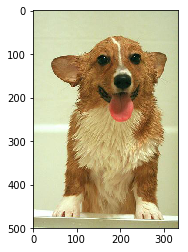

In [12]:
# 원본 이미지 보기
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image_batch) #, cmap='gray')

In [13]:
# file 1개, 1차원을 추가
image_batch = np.expand_dims(image_batch, axis=0)
image_batch = np.array(image_batch, dtype='f')
#image_batch.shape

In [14]:
# image is ( 1 file, 500 pixels high , 333 pixels wide , 3 colors “deep” )
image_batch = tf.constant(image_batch)
image_batch.shape

TensorShape([Dimension(1), Dimension(500), Dimension(333), Dimension(3)])

In [15]:
# Edge 검출용 커널
kernel_edge = tf.constant([
        [  [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
           [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
           [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]  ],
        [  [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
           [[ 8., 0., 0.], [ 0., 8., 0.], [ 0., 0., 8.]],
           [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]  ],
        [  [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
           [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
           [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]  ]])
kernel_edge.shape

TensorShape([Dimension(3), Dimension(3), Dimension(3), Dimension(3)])

In [16]:
with tf.Session() as sess:
    conv2d = tf.nn.conv2d(image_batch, kernel_edge, strides=[1, 1, 1, 1], padding='SAME')
    active_map = sess.run(tf.minimum(tf.nn.relu(conv2d),  255))

active_map = active_map.reshape(500,333,3) # 1 차원 줄이기

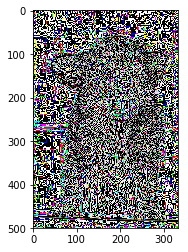

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(active_map) #, cmap='gray')

### Kernal in Depth 2 
시각적으로 이미지를 선명하게 만들기

In [18]:
image_batch.shape

TensorShape([Dimension(1), Dimension(500), Dimension(333), Dimension(3)])

In [19]:
# Edge 검출용 커널
kernel_aliging = tf.constant([
        [   [[ 0., 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ 0., 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]]     ],
        [   [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ 5., 0., 0.], [ 0., 5., 0.], [ 0., 0., 5.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]  ],
        [   [[ 0., 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ 0, 0., 0.], [ 0., 0., 0.], [ 0., 0., 0.]] ]])
kernel_aliging.shape

TensorShape([Dimension(3), Dimension(3), Dimension(3), Dimension(3)])

In [20]:
with tf.Session() as sess:
    conv2d = tf.nn.conv2d(image_batch, kernel_aliging, strides=[1, 1, 1, 1], padding='SAME')
    active_map = sess.run(tf.minimum(tf.nn.relu(conv2d),  255))

active_map = active_map.reshape(500,333,3) # 1 차원 줄이기

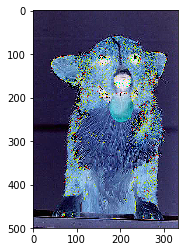

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(active_map) #, cmap='gray')

### Convolution Layers
컨볼루션의 속도를 상승시킨다

In [22]:
tf.nn.depthwise_conv2d   # 컨볼루션 출력을 다른 컨볼루션의 입력으로 연결 (큰 모델의 속도를 상승)
tf.nn.conv2d_transpose   # 각 영역이 커널과 같은 값으로 채워진 feature map에 적용

<function tensorflow.python.ops.nn_ops.conv2d_transpose>

### Activation Functions
다른 layer의 결과와 결합한 featuremap을 만들 떄 사용

특정 Operation 결과를 평탄화, 미분을 위해서 사용

In [23]:
#tf.nn.relu()
# 0보다 작으면 0 | 0보다 크면 원본을 출력
feature = tf.range(-2,3)  # -2 ~ 3 을 갖는 1 tensor(벡터)

with tf.Session() as sess:
    print(sess.run([feature, tf.nn.relu(feature)]))

[array([-2, -1,  0,  1,  2], dtype=int32), array([0, 0, 0, 1, 2], dtype=int32)]


In [24]:
#tf.sigmoid()
# 0 ~ 1. 사이의 확률값을 출력
feature = tf.to_float(tf.range(-1,3))

with tf.Session() as sess:
    print(sess.run([feature, tf.sigmoid(feature)]))

[array([-1.,  0.,  1.,  2.], dtype=float32), array([ 0.26894143,  0.5       ,  0.7310586 ,  0.88079703], dtype=float32)]


In [25]:
#tf.tanh()
# -1. ~ 1. 사이의 값을 출력
# 신경망에서 '음수값'에 대한 대비가 없으면 문제가 될 수 있음에 주의!
feature = tf.to_float(tf.range(-1,3))

with tf.Session() as sess:
    print(sess.run([feature, tf.tanh(feature)]))

[array([-1.,  0.,  1.,  2.], dtype=float32), array([-0.76159418,  0.        ,  0.76159418,  0.96402758], dtype=float32)]


In [26]:
#tf.nn.dropout()
# 모델 중간에만 활용해야 결과 외곡을 방지할 수 있다.
feature = tf.constant([-1., 0., 0.1, 0.2])

with tf.Session() as sess:
    print(sess.run([feature, tf.nn.dropout(feature, keep_prob=0.5)]))

[array([-1. ,  0. ,  0.1,  0.2], dtype=float32), array([-0.        ,  0.        ,  0.        ,  0.40000001], dtype=float32)]


### Pooling Layer
over-fitting 을 방지하고, 입력의 크지를 줄임으로써 성능을 향상

In [27]:
# tf.nn.max_pool()
# 커널내부의 값 중 최대값만 추출 - 밝기 특징을 찾는데 유용
batch_size=1
input_height = 3
input_width = 3
input_channels = 1
layer_input = tf.constant([
        [   [[1.0], [0.2], [1.5]],
            [[0.1], [1.2], [1.4]],
            [[1.1], [0.4], [0.4]]  ]])

# The strides will look at the entire input by using the image_height and image_width
with tf.Session() as sess:
    kernel = [batch_size, input_height, input_width, input_channels]
    max_pool = tf.nn.max_pool(layer_input, kernel, [1, 1, 1, 1], "VALID")
    print(sess.run(max_pool))

[[[[ 1.5]]]]


In [28]:
# tf.nn.avg_pool() 
# 커널 tensor 위를 stride 하면서, 내부 depth를 평균값을 출력한다 (폭/너비는 크나 깊이는 얕을 떄)
batch_size=1
input_height = 3
input_width = 3
input_channels = 1
layer_input = tf.constant([
        [   [[1.], [1.], [1.]],
            [[1.], [.5], [0.]],
            [[0.], [0.], [0.]]  ]])

# The strides will look at the entire input by using the image_height and image_width
with tf.Session() as sess:
    kernel = [batch_size, input_height, input_width, input_channels]
    max_pool = tf.nn.avg_pool(layer_input, kernel, [1, 1, 1, 1], "VALID")
    print(sess.run(max_pool))

[[[[ 0.5]]]]


### Normalization
tf.nn.relu를 사용시, 범위제한이 없는게 단점, 떄문에 고주파를 계량화 할 필요

In [29]:
# tf.nn.local_response_normalization(tf.nn.lrn)  -> 0. ~ 1. 값으로 치환
# 덧셈 오퍼레이션에 기반한 출력 모양을 정하는 함수 - 입력을 수용 가능한 숫자범위로 제한
# 각 값의 중요도를 고려하면서 정규화를 한다

layer_input = tf.constant([   [[[1.]], [[2.]], [[3.]]]  ])

with tf.Session() as sess:
    lrn = tf.nn.local_response_normalization(layer_input)
    org , normalize = sess.run([layer_input ,lrn])
    print(' 원본 : \n', org,  '\n\n Normalization \n', normalize)

 원본 : 
 [[[[ 1.]]

  [[ 2.]]

  [[ 3.]]]] 

 Normalization 
 [[[[ 0.70710677]]

  [[ 0.89442718]]

  [[ 0.94868326]]]]


### High Level Layer
중복코드를 제거하는데 용이

In [30]:
# tf.contrib.layers.convolution2d()
# tf.nn.conv2d() 와 동일한 로직, 1번 설정하면 반복적 수행한다

image_input = tf.constant([
    [  [[0., 0., 0.], [255., 255., 255.], [254., 0., 0.]],
       [[0., 191., 0.], [3., 108., 233.], [0., 191., 0.]],
       [[254., 0., 0.], [255., 255., 255.], [0., 0., 0.]]  ]   ])

conv2d = tf.contrib.layers.convolution2d(
                image_input,  num_outputs=4,  kernel_size=(1,1),
                activation_fn=tf.nn.relu, # It's only the filter height and width
                stride=(1, 1),  trainable=True)

with tf.Session() as sess:
    tf.global_variables_initializer().run()  # FailedPreconditionError 변수들의 초기화 오류
    print(sess.run(conv2d))

[[[[   0.            0.            0.            0.        ]
   [ 162.27838135    0.            5.68510437  407.85290527]
   [   0.            0.          139.97286987  218.61952209]]

  [[ 127.0562973     0.            0.          141.85305786]
   [ 129.50686646    0.            0.           81.86724854]
   [ 127.0562973     0.            0.          141.85305786]]

  [[   0.            0.          139.97286987  218.61952209]
   [ 162.27838135    0.            5.68510437  407.85290527]
   [   0.            0.            0.            0.        ]]]]


In [31]:
# tf.contrib.layers.fully_connected() 
# Nural Netword 의 마지막 완전연결 레이어 실행함수
features = tf.constant([ [[1.2], [3.4]] ])
fc = tf.contrib.layers.fully_connected(features, num_outputs=2)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(fc))

[[[ 0.          0.73525876]
  [ 0.          2.08323312]]]


## 3 Image  
http://byungjin-study.blogspot.kr/2017/02/tensorflow-chapter-6_23.html

### Loading Image File
by Queue, Coordinator (모든 image 는 height/ width/ channel 가 동일해야 한다)

https://stackoverflow.com/questions/37340129/tensorflow-training-on-my-own-image

In [32]:
# 파일이 많으면 한꺼번에 메모리에 저장하기엔 부담이 크다.
# Queue Runner : 학습을 할 때마다 하나씩 로딩하는 Queue Runner 를 활용
# Coordinator : Queue Runner 는 Multi Thread로 작동하므로, Thread를 관리할 Coordinator를 활용한다

In [33]:
# step 1
filenames = ['im_01.jpg', 'im_02.jpg', 'im_03.jpg', 'im_04.jpg']

# step 2
filename_queue = tf.train.string_input_producer(filenames)
filename_queue

In [34]:
# step 3: read, decode and resize images
reader = tf.WholeFileReader()
filename, content = reader.read(filename_queue)
image = tf.image.decode_jpeg(content, channels=3) # Queue로 읽을 때 thread 를 3개로 분산실행
image = tf.cast(image, tf.float32)
resized_image = tf.image.resize_images(image, [224, 224])  # Image 크기를 일정하게 통일시킨다

# step 4: Batching
image_batch = tf.train.batch([resized_image], batch_size=8)

### Cropping

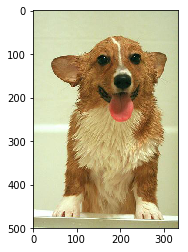

In [35]:
# image 파일 불러오기 (pip install pillow 를 해야 png 이외도 인식가능)
filename = "./data/n02113023_219.jpg"
image = mpimg.imread(filename)
plt.imshow(image) #, cmap='gray')  # 원본 이미지 보기

In [36]:
# 중앙기준 이미지 10%를 잘라내서 출력
with tf.Session() as sess:
    crop_image = sess.run(tf.image.central_crop(image,0.1))
crop_image

array([], shape=(0, 1, 3), dtype=uint8)

In [37]:
# 이미지 0,0 서 2,1 좌표 부분을 잘라내기
sess.close()
# image array  -->  Tensor
image = tf.constant(image)
with tf.Session() as sess:
    real_image = sess.run(image)
    bounding_crop = tf.image.crop_to_bounding_box(real_image, 
                                              offset_height=0, offset_width=0, 
                                              target_height=2, target_width=1)
    bounding_crop = sess.run(bounding_crop)

bounding_crop

array([[[205, 216, 174]],

       [[204, 215, 173]]], dtype=uint8)

### Padding 
0,0,0 를 활용해서 빈 공간 채우기

In [38]:
with tf.Session() as sess:
    crop_or_pad = tf.image.resize_image_with_crop_or_pad(bounding_crop,
                                    target_height=2, target_width=5)
    crop_or_pad = sess.run(crop_or_pad)

crop_or_pad

array([[[  0,   0,   0],
        [  0,   0,   0],
        [205, 216, 174],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [204, 215, 173],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)

### Flipping  (지독한, 괴씸한)
수평, 수직으로 픽셀의 위치가 뒤집어 짐

In [39]:
with tf.Session() as sess:
    top_left_pixel = tf.slice(real_image, [0,0,0],[2,2,3])
    flip_horizon = tf.image.flip_left_right(top_left_pixel)
    flip_vertical = tf.image.flip_up_down(flip_horizon)
    top_left_pixel, flip_horizon, flip_vertical = sess.run([ top_left_pixel, flip_horizon, flip_vertical ])

In [40]:
top_left_pixel # 잘라내기

array([[[205, 216, 174],
        [205, 216, 174]],

       [[204, 215, 173],
        [205, 216, 174]]], dtype=uint8)

In [41]:
flip_horizon  # 좌우 반전

array([[[205, 216, 174],
        [205, 216, 174]],

       [[205, 216, 174],
        [204, 215, 173]]], dtype=uint8)

In [42]:
flip_vertical # 상하 반전

array([[[205, 216, 174],
        [204, 215, 173]],

       [[205, 216, 174],
        [205, 216, 174]]], dtype=uint8)

### 채도와 균형 조절하기

In [43]:
# tf.image.adjust_brightness() 밝기를 0.2증가
with tf.Session() as sess:
    example_red_pixel = tf.constant([254.,2., 15.])
    adjust_brightness = tf.image.adjust_brightness(example_red_pixel, 0.2)
    adjust_brightness = sess.run(adjust_brightness)
adjust_brightness

array([ 254.19999695,    2.20000005,   15.19999981], dtype=float32)

array([[[176, 149, 104],
        [176, 149, 103],
        [175, 148, 102]]], dtype=uint8)

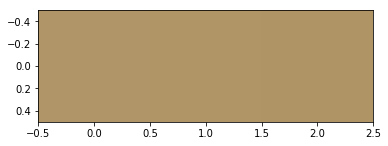

In [44]:
# tf.image.adjust_contrast() 대조를 -.5 만큼 바꿔서 잘 알아보지 못하게 수정
with tf.Session() as sess:
    adjust_contrast = tf.image.adjust_contrast(image, -.5)
    adjust_contrast = sess.run(tf.slice(adjust_contrast, [1,0,0],[1,3,3]))
plt.imshow(adjust_contrast)
adjust_contrast 

array([[[215, 173, 195],
        [216, 174, 196],
        [217, 177, 198]]], dtype=uint8)

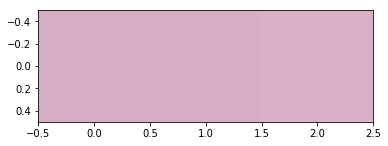

In [45]:
# tf.image.adjust_hue() 변경된 픽셀 중 하나를 강조
with tf.Session() as sess:
    adjust_hue = tf.image.adjust_hue(image, 0.7)
    adjust_hue = sess.run(tf.slice(adjust_hue, [1,0,0],[1,3,3]))
plt.imshow(adjust_hue)
adjust_hue

### 색상

In [46]:
with tf.Session() as sess:
    gray = tf.image.rgb_to_grayscale(real_image)
    gray = sess.run(tf.slice(gray, [0,0,0],[1,3,1]))
gray
#plt.imshow(gray, cmap='gray')

array([[[208],
        [208],
        [209]]], dtype=uint8)

### HSV
Hue : 색상, Saturation : 채도, Value : 명도

array([[[ 0.21031746,  0.19444449,  0.84705889],
        [ 0.21031746,  0.19444449,  0.84705889],
        [ 0.21249998,  0.18433183,  0.85098046]],

       [[ 0.21031746,  0.19534887,  0.84313732],
        [ 0.21031746,  0.19444449,  0.84705889],
        [ 0.21249998,  0.18433183,  0.85098046]],

       [[ 0.21031746,  0.19534887,  0.84313732],
        [ 0.21031746,  0.19444449,  0.84705889],
        [ 0.21249998,  0.18433183,  0.85098046]]], dtype=float32)

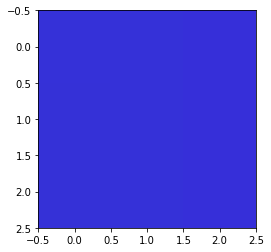

In [47]:
with tf.Session() as sess:
    hsv = tf.image.rgb_to_hsv(tf.image.convert_image_dtype(image, tf.float32))
    hsv = sess.run(tf.slice(hsv, [0,0,0], [3,3,3]))

plt.imshow(hsv)
hsv

### RGB

array([[[ 0.80392164,  0.84705889,  0.68235296],
        [ 0.80392164,  0.84705889,  0.68235296],
        [ 0.80784321,  0.85098046,  0.69411767]],

       [[ 0.80000007,  0.84313732,  0.67843139],
        [ 0.80392164,  0.84705889,  0.68235296],
        [ 0.80784321,  0.85098046,  0.69411767]],

       [[ 0.80000007,  0.84313732,  0.67843139],
        [ 0.80392164,  0.84705889,  0.68235296],
        [ 0.80784321,  0.85098046,  0.69411767]]], dtype=float32)

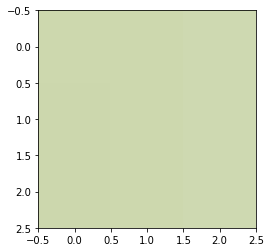

In [48]:
with tf.Session() as sess:
    rgb_hsv = tf.image.hsv_to_rgb(hsv)
    rgb_grayscale = tf.image.grayscale_to_rgb(gray)
    hsv = sess.run(tf.slice(rgb_hsv, [0,0,0], [3,3,3]))

plt.imshow(hsv)
hsv

## 4 CNN 구현
http://vision.stanford.edu/aditya86/ImageNetDogs/

In [57]:
# 폴더내부의 해당 확장자 파일 목록을 list로 만든다!!! 
# (dir, ls 와 같은 방식으로 작업이 가능)
import glob
#image_filenames = glob.glob("./data/*.jpg")
image_filenames = glob.glob("./data/t*.*")
image_filenames

['./data/train.csv', './data/test-input-image.jpg']

In [50]:
from itertools import groupby
from collections import defaultdict

In [51]:
## CPU vs GPU processing
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

In [52]:
def get_times(maximum_time):
    device_times = {"/gpu:0":[],"/cpu:0":[]}
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():
            print("####### Calculating on the " + device_name + " #######")
            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)

            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                start_time = time.time()
                result = session.run(dot_operation)
                time_taken = time.time() - start_time
                print(result)
                device_times[device_name].append(time_taken)

            print(device_times)
            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [53]:
device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

####### Calculating on the /gpu:0 #######
[[ 125.375   121.0625  118.75   ...,  121.25    116.5     122.875 ]
 [ 132.25    130.125   123.1875 ...,  126.5625  122.5     123.125 ]
 [ 131.25    127.0625  125.3125 ...,  124.5625  122.9375  118.5   ]
 ..., 
 [ 129.125   126.375   123.875  ...,  126.6875  126.125   123.375 ]
 [ 129.125   126.75    125.1875 ...,  125.125   121.4375  124.9375]
 [ 128.625   126.6875  122.125  ...,  123.75    121.875   120.    ]]
{'/gpu:0': [0.017052650451660156], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[ 116.375   123.125   119.3125 ...,  125.5     127.75    127.375 ]
 [ 120.375   126.875   122.125  ...,  128.75    124.6875  129.75  ]
 [ 118.75    122.875   119.     ...,  126.5     123.625   127.875 ]
 ..., 
 [ 112.4375  116.125   115.75   ...,  122.625   120.875   123.875 ]
 [ 118.      125.3125  117.8125 ...,  126.9375  127.75    130.375 ]
 [ 116.3125  118.25    113.     ...,  120.5     119.25    119.625 ]]
{'/gpu:0': [0.017052650451660156], 

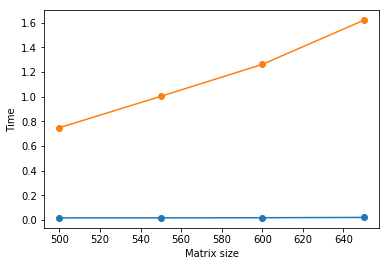

In [54]:
plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()